# PRACTICA N°9

##### **TEMA:** _ K-Nearest Neighbors_

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

##### **OBJETIVOS:** 
+ Analizar un dataset mediante algoritmos de aprendizaje supervisado para crear un modelo de clasificación.
+ Emplear el algoritmo K-Nearest Neighbors para clasificar datos.
+ Familiarizarce con las librerías y métodos de python para obtener modelos de 
clasificación mediante KNN.

In [4]:
import pandas as pd
df=pd.read_csv("UsuariosTwitter.csv")

## **Análisis general:**

Determinar el **tamaño** del dataset (Número de Registros y número de variables)

In [5]:
df.shape
#Numero de Registros = 140 y Numero de variables11

(140, 11)

Determinar el **tipo de dato** de cada una de las variables del dataset.

In [6]:
df.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
Unnamed: 0.1.1                    int64
Nombre-usuario                   object
Apertura-nuevas-experiencias    float64
Grado-orden                     float64
Grado-timidez                   float64
Grado-empatia                   float64
Grado-neuroticiscmo             float64
Promedio-palabras               float64
Etiquetas                         int64
dtype: object

Verificar si existen **datos faltantes** en el dataset.

In [7]:
import numpy as np
datos_faltantes=df.isnull()
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print(datos_faltantes[column].value_counts())
    print("")

Unnamed: 0
False    140
Name: Unnamed: 0, dtype: int64

Unnamed: 0.1
False    140
Name: Unnamed: 0.1, dtype: int64

Unnamed: 0.1.1
False    140
Name: Unnamed: 0.1.1, dtype: int64

Nombre-usuario
False    140
Name: Nombre-usuario, dtype: int64

Apertura-nuevas-experiencias
False    140
Name: Apertura-nuevas-experiencias, dtype: int64

Grado-orden
False    140
Name: Grado-orden, dtype: int64

Grado-timidez
False    140
Name: Grado-timidez, dtype: int64

Grado-empatia
False    140
Name: Grado-empatia, dtype: int64

Grado-neuroticiscmo
False    140
Name: Grado-neuroticiscmo, dtype: int64

Promedio-palabras
False    140
Name: Promedio-palabras, dtype: int64

Etiquetas
False    140
Name: Etiquetas, dtype: int64



Modificar el **tipo de dato** de las variables de entrada que considere necesario

In [ ]:
# No es necesario modificar el tipo de dato, ya que todos son numéricos

Determine cuántas categorías tiene la variable de salida y la cantidad de registros que han sido clasificadas en cada categoría.

In [8]:
df["Etiquetas"].value_counts()

0    45
2    38
3    36
1    21
Name: Etiquetas, dtype: int64

Graficar la distribución de los datos de las variables de entrada, utilizando la gráfica de **histograma**.


array([[<AxesSubplot:title={'center':'Apertura-nuevas-experiencias'}>]],
      dtype=object)

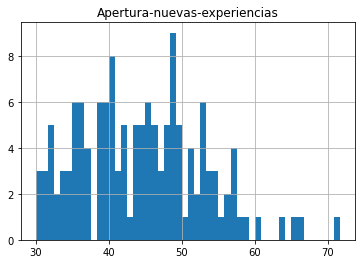

In [9]:
df.hist(column="Apertura-nuevas-experiencias",bins=50)

array([[<AxesSubplot:title={'center':'Grado-orden'}>]], dtype=object)

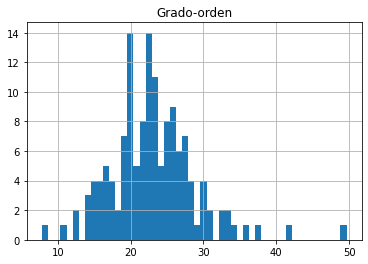

In [10]:
df.hist(column="Grado-orden",bins=50)

array([[<AxesSubplot:title={'center':'Grado-timidez'}>]], dtype=object)

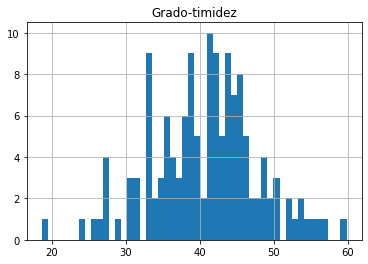

In [11]:
df.hist(column="Grado-timidez",bins=50)

array([[<AxesSubplot:title={'center':'Grado-empatia'}>]], dtype=object)

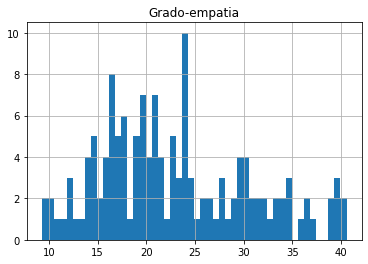

In [12]:
df.hist(column="Grado-empatia",bins=50)

array([[<AxesSubplot:title={'center':'Grado-neuroticiscmo'}>]],
      dtype=object)

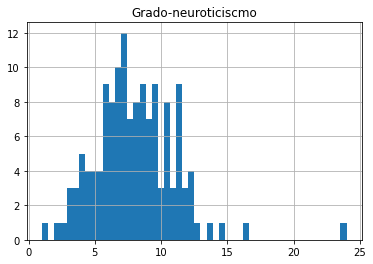

In [13]:
df.hist(column="Grado-neuroticiscmo",bins=50)

array([[<AxesSubplot:title={'center':'Promedio-palabras'}>]], dtype=object)

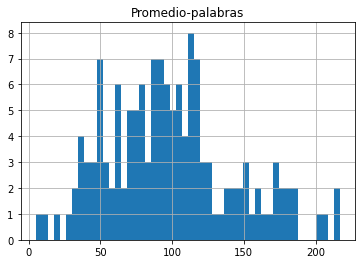

In [14]:
df.hist(column="Promedio-palabras",bins=50)

## **Modelo de Clasificación con KNN**


In [17]:
#Definir las variables
x=np.asarray(df[["Apertura-nuevas-experiencias","Grado-orden","Grado-timidez","Grado-empatia","Grado-neuroticiscmo","Promedio-palabras"]])
y=df["Etiquetas"]

In [19]:
#Normalizar 
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-1.20499609,  0.89227886,  0.16542841,  0.84561194,  0.6080745 ,
        -1.38306004],
       [ 0.06816102, -0.42292159, -0.39464568,  0.1783249 ,  0.78005819,
        -0.44706295],
       [-0.31930346, -1.59276314, -0.2464589 ,  1.53701373,  0.27634669,
        -1.11000094],
       [-0.48090044, -1.3111838 ,  1.61646035,  1.06997636, -0.98001978,
        -0.40987669],
       [-0.92309481, -0.57537172,  1.08475959,  1.07741005, -0.2292087 ,
        -1.1592871 ]])

In [20]:
#Dividir el dataset 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=4)

In [21]:
xtrain.shape

(105, 6)

In [22]:
xtest.shape

(35, 6)

Obtenga el modelo de clasificación para el dataset con los métodos apropiados.Utilice todas las variables de entrada.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#Definimos el numero de vecinos
k=4
#Creamos el objeto KNN
knn=KNeighborsClassifier(n_neighbors=k)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [24]:
#Ajustar o entrenar
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [25]:
#Calcular o obtener la hipotesis o predicciones (Resultados de la clasificacion)
predicciones=knn.predict(xtest)

In [26]:
predicciones

array([3, 2, 3, 0, 0, 0, 3, 0, 0, 1, 3, 1, 0, 3, 1, 0, 2, 0, 2, 0, 3, 2,
       0, 0, 3, 3, 2, 2, 3, 2, 3, 0, 0, 0, 0])

Evalúe el modelo obtenido con las **métricas** que considere pertinentes.

In [30]:
from sklearn.metrics import accuracy_score, precision_score
acc=accuracy_score(ytest,predicciones)
print("Exactitud del modelo KNN es:",acc)

Exactitud del modelo KNN es: 0.6571428571428571


Determine y justifique la selección del mejor valor de **k** para el modelo de Clasificación.

In [31]:
#Definir un vector para almacenar el accuracy para varios valores de k
k=10
v_acc=np.zeros((k-1))
#Lazo para evaluar varios valores k
for n in range(1,k):
    knn1=KNeighborsClassifier(n_neighbors=n)
    knn1.fit(xtrain,ytrain)
    predicciones1=knn1.predict(xtest)
    v_acc[n-1]=accuracy_score(ytest,predicciones1)
v_acc

array([0.68571429, 0.71428571, 0.65714286, 0.65714286, 0.65714286,
       0.65714286, 0.68571429, 0.71428571, 0.74285714])

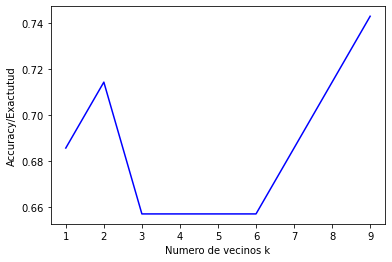

In [33]:
import matplotlib.pyplot as plt
#Grafica accuracy vs k
plt.plot(range(1,k),v_acc,"blue")
plt.xlabel("Numero de vecinos k")
plt.ylabel("Accuracy/Exactutud")
plt.show()

In [ ]:
# El mejor valor de k es igual 9 ya que da el accuracy mas alto 74,28

Aplique **PCA** para disminuir el número de variables de entrada.

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
#Crear la nueva variable de entrada normalizada
x_se=StandardScaler().fit_transform(x)

In [36]:
#Instanciamos el objeto PCA y definimos 6 componentes principales
pca=PCA(n_components=6)

In [37]:
#Obtener componentes principales
pca.fit(x_se)
#X_pca tien las componenete principales
X_pca=pca.transform(x_se)

Obtenga nuevamente el modelo de Clasificación y evalúe con las **métricas** que considere pertinentes.

In [38]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X_pca,y,test_size=0.3,random_state=3)

In [43]:
#Definimos el numero de vecinos
k1=9
#Creamos el objeto KNN
knn2=KNeighborsClassifier(n_neighbors=k1)
knn2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [44]:
#Ajustar o entrenar
knn2.fit(xtrain1,ytrain1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [45]:
#Calcular o obtener la hipotesis o predicciones (Resultados de la clasificacion)
predicciones2=knn2.predict(xtest1)

In [46]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(ytest1,predicciones2)
print("Exactitud del modelo KNN es:",acc1)

Exactitud del modelo KNN es: 0.5476190476190477


Realice una tabla comparativa con las métricas antes y después de aplicar **PCA**. Comente los resultados obtenidos.

* | sin PCA | con PCA
--|--|--
Exactitud| 0.74285714 | 0.5476190476190477


In [ ]:
# K=9 